# Priorización de hipótesis y Analizar un Test A/B

Como analista en una gran tienda en línea. Junto con el departamento de marketing hemos recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. Tenemos que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

Este proyecto se divide en dos partes:

### **Priorizar hipótesis**
Recibimos el archivo *hypotheses_us.csv* que contiene nueve hipótesis sobre cómo aumentar los ingresos de nuestra tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.

Para priorizar las hipótesis realizaremos los siguientes pasos:
1. Aplicar el framework ICE para priorizar hipótesis.
2. Aplicar el framework RICE para priorizar hipótesis.
3. Comparar los dos framework y producir una explicación de los posibles cambios entre uno y otro.

### **Análisis de test A/B**
Realizamos un test A/B y obtuvimos los resultados descritos en los archivos *orders_us.csv* y *visitors_us.csv*.

Para analizar el test A/B realizaremos los siguientes pasos:
1. Representar gráficamente el ingreso acumulado por grupo.
2. Representar gráficamente el tamaño de pedido promedio acumulado por grupo.
3. Representar gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.
4. Calcular la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. 
5. Trazar un gráfico de dispersión del número de pedidos por usuario.
6. Calcular los percentiles 95 y 99 para el número de pedidos por usuario. De esta manera podremos definir el punto en el cual un punto de datos se convierte en una anomalía.
7. Trazar un gráfico de dispersión de los precios de los pedidos.
8. Calcular los percentiles 95 y 99 de los precios de los pedidos.
9. Encuentrar la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. 
10. Encuentrar la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.
11. Encuentrar la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.
12. Encuentrar la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.
13. Basandonos en los resultados de la prueba podremos tomar la decisión de parar la prueba si descubrimos que uno de los grupos está claramente liderando o que ambos grupos se comportan igualmente, o seguir la prueba por más tiempo.

# Contenido <a id='back'></a>

* [1 Priorizar hipótesis](#priorizar_hipotesis)
    * [1.1 Cargar datos](#carga_datos)
    * [1.2 Análisis con el framework ICE](#ice)
    * [1.3 Análisis con el framework RICE](#rice)
    * [1.4 Conclusión](#hipotesis_conclution)
* [2 Análisis de test A/B](#analisis_AB)
    * [2.1 Cargar datos](#carga_datos_2)
    * [2.2 Ingreso acumulado por grupo](#ingreso_x_grupo)
    * [2.3 Pedido promedio acumulado por grupo](#pedido_prom_x_grupo)
    * [2.4 Diferencia relativa en el tamaño de pedido promedio acumulado](#diferencia_relativa)
    * [2.5 Tasa de conversión de cada grupo](#conversion_grupo)
    * [2.6 Dispersión de pedidos por usuario](#dispersion_pedidos)
    * [2.7 ¿Cuando el número de pedidos se convierten en una anomalía?](#pedidos_anomalos)
    * [2.8 Dispersión de precios por pedidos](#dispersion_pedidos)
    * [2.9 ¿Cuando los precios se convierten en una anomalía?](#precios_anomalos)
    * [2.10 Significancia estadística de la diferencia en la conversión](#significancia_estadistica)
    * [2.11 Significancia estadística de la diferencia en el tamaño promedio de pedido](#significancia_promedio)
    * [2.12 Significancia estadística de la diferencia en la conversión (datos filtrados)](#significancia_estadistica_2)
    * [2.13 Significancia estadística de la diferencia en el tamaño promedio de pedido (datos filtrados)](#significancia_promedio_2)
* [3 Conclusión General](#conclusion)
    * [3.1 Conclusión de la primera parte](#conclusion_1)
    * [3.2 Conclusión de la segunda parte](#conclusion_2)

## Priorizar hipótesis <a id='priorizar_hipotesis'></a>

Con el fin de resolver nuestras dudas cargaremos las siguientes librerías:
- Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Carga de datos: <a id='carga_datos'></a>

Recibimos el archivo *hypotheses_us.csv* separado por punto y coma. Vamos cargarlo y estudiarlo:

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
pd.set_option('display.max_colwidth', 210)

hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


### Análisis con el framework ICE: <a id='ice'></a>

In [3]:
hypotheses['ICE'] = (hypotheses['Confidence'] * hypotheses['Impact']) / hypotheses['Effort']
ICE = hypotheses[['Hypothesis', 'ICE']]

print(ICE.sort_values(by='ICE', ascending=False))

                                                                                                               Hypothesis  \
8                                                        Launch a promotion that gives users discounts on their birthdays   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
1                                                       Launch your own delivery service. This will shorten delivery time   
5                                                     Add a customer review page. This will increase the number of orders   


Como se puede apreciar el método ICE presenta las hypótesis con índice 8, 0 y 7 como las más prometedoras. 

### Análisis con el framework RICE: <a id='rice'></a>

In [4]:
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Confidence'] * hypotheses['Impact']) / hypotheses['Effort']
RICE = hypotheses[['Hypothesis', 'RICE']]

print(RICE.sort_values(by='RICE', ascending=False))

                                                                                                               Hypothesis  \
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
8                                                        Launch a promotion that gives users discounts on their birthdays   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
1                                                       Launch your own delivery service. This will shorten delivery time   


En el caso del framework RICE, nótamos que la hipótesis más prometedora con diferencia es la número 7 (*Add a subscription form to all the main pages...*). Muy por debajo se encuentra la 2, 0 6 y 8. 

### Conclusión: <a id='hipotesis_conclution'></a>

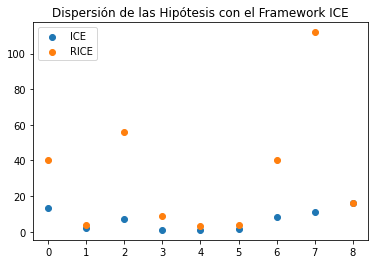

In [5]:
x_values = pd.Series(range(0, len(RICE)))
plt.scatter(x_values, ICE['ICE'], label='ICE')
plt.scatter(x_values, RICE['RICE'], label='RICE')
plt.legend()
plt.title('Dispersión de las Hipótesis con el Framework ICE')
plt.show(block=False)

La hipótesis más prometedora es la número 7 (*Add a subscription form to all the main pages...*). Está aparece en el tercer puesto con el método ICE, con un esfuerzo intermedio (valor 5 de 10), un parámatro de confianza muy alto (8 de 10) y un impact tan bien alto (7 de 10). 

Por otro lado, al estudiar el frawork RICE, la hipótesis 7 es sin discusión alguna la más prometedora. La razón por la que la hipótesis 7 está muy por encima del resto es porque su parametro Reach es 10, que si lo comparamos con las más prometedoras del método ICE hipótesis 8 tiene un Reach de solo 1 y la hipótesis de índice 0 tiene un Reach de 3.

## Análisis de test A/B <a id='analisis_AB'></a>

Con el fin de resolver esta sección cargaremos las siguientes librerías:
- Pandas
- scipy.stats
- datetime
- numpy
- matplotlib

In [6]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

### Carga de datos: <a id='carga_datos_2'></a>

Recibimos los archivos *hypotheses_us.csv* y *hypotheses_us.csv*. Vamos cargarlos y estudiarlos a continuación:

In [7]:
orders = pd.read_csv('/datasets/orders_us.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

La tabla *orders* contiene los registros de las compras realizadas:
- **transactionId**: identificador de pedido
- **visitorId**: identificador del usuario que realizó el pedido
- **date**: fecha del pedido
- **revenue**: ingresos del pedido
- **group**: el grupo del test A/B al que pertenece el usuario

In [8]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [9]:
orders = orders.rename(
    columns={
        'transactionid':'transaction_id', 
        'visitorid':'visitor_id', 
        'date':'date', 
        'revenue':'revenue', 
        'group':'group',
    }
)

In [10]:
orders.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [11]:
orders.tail(5)

,transaction_id,visitor_id,date,revenue,group
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A
1196,3936777065,2108080724,2019-08-15,3120.1,B


Analizaremos rápidamente los datos recibidos:

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [13]:
orders.describe()

,transaction_id,visitor_id,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [14]:
orders.duplicated().sum()

0

La tabla *orders* consta de 5 columnas y 1197 líneas. Los nombres de las columnas fueron originalmente traspasados a mínusculas, pero luego se cambiaron además a *snake_case* para facilitar su lectura. Esta tabla no contiene valores ausentes, ni duplicados.

In [15]:
visits = pd.read_csv('/datasets/visits_us.csv', sep=',')
visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

La tabla *visits* contiene los registros de visitas realizados:
- **date**: la fecha
- **group**: grupo del test A/B
- **visits**: el número de visitas en la fecha especificada para el grupo de test A/B especificado

In [16]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [17]:
visits.columns = ['date', 'group', 'visits']

In [18]:
visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
visits.tail(5)

,date,group,visits
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [20]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [21]:
visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [22]:
visits.duplicated().sum()

0

La tabla *visits* consta de 3 columnas y 62 líneas. Los nombres de las columnas fueron traspasados a mínusculas. Esta tabla no contiene valores ausentes, ni duplicados. Hemos probado que en ambas tablas no hay datos duplicados ni registros ausentes. Vamos ahora a revisar si existen visitantes que hpor error se encuentren en ambos grupos.

In [23]:
double_groups_A = orders.query('group == "A"').drop_duplicates('visitor_id')
double_groups_B = orders.query('group == "B"').drop_duplicates('visitor_id')
double_groups = double_groups_B[double_groups_B['visitor_id'].isin(double_groups_A['visitor_id'])]
double_groups['visitor_id'].count()

58

Encontramos 58 visitors ID que se encuentran en ambos grupos. Vamos a quitar a estos elementos de nuestra tabla original:

In [24]:
orders = orders[~(orders.visitor_id.isin(double_groups.visitor_id))]
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


Podemos notar que nuestra nueva tabla tiene 1016 filas, vamos a comprobar que no tenemos visitors ID en ambos grupos:

In [25]:
double_groups_A = orders.query('group == "A"').drop_duplicates('visitor_id')
double_groups_B = orders.query('group == "B"').drop_duplicates('visitor_id')
double_groups = double_groups_B[double_groups_B['visitor_id'].isin(double_groups_A['visitor_id'])]
double_groups['visitor_id'].count()

0

Hemos comprobado que nuestra Database *orders* ahora no tiene visitor_id en ambos grupos con lo que podremos continuar nuestro estudio sin miedo a ensuciar los datos.

### Ingreso acumulado por grupo: <a id='ingreso_x_grupo'></a>

Primero crearomos una matriz con los valores únicos de parejas fecha-grupo:

In [26]:
datesGroups = orders[['date','group']].drop_duplicates()

Entonces obtendremos los datos diarios acumulados agregados sobre los pedidos:

In [27]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'transaction_id' : pd.Series.nunique, 
            'visitor_id' : pd.Series.nunique, 
            'revenue' : 'sum'
        }
    ), 
    axis=1
).sort_values(by=['date','group'])

Ahora obtendremos los datos diarios acumulados agregados sobre los visitantes:

In [28]:
visitorsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}),
    axis=1
).sort_values(by=['date','group'])

Fusionaremos estas dos tablas en una:

In [29]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


Crearemos ahora una base de datos con los pedidos acumulados e ingresos acumulados por día tanto para el grupo A como el B:

In [30]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Finalmente, podemos obtener un gráfico de los ingresos acumulados por grupo:

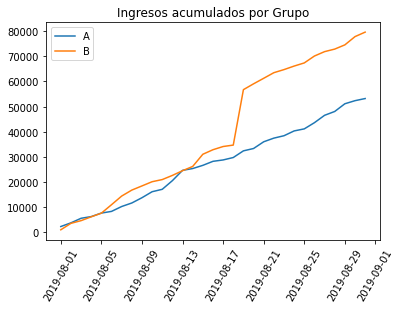

In [31]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Ingresos acumulados por Grupo')
plt.xticks(rotation=60)
plt.show(block=False)

Como se puede apreciar al principio partieron bastante igualados, pero a los 5 días el segmento B tomó la delantera y se mantuvo subiendo. Tuvo un pic grande el día 17 y luego siguió creciendo. Podrían haber valores anormales que afectaran los resultados. Seguiremos investigando.

### Pedido promedio acumulado por grupo: <a id='pedido_prom_x_grupo'></a>

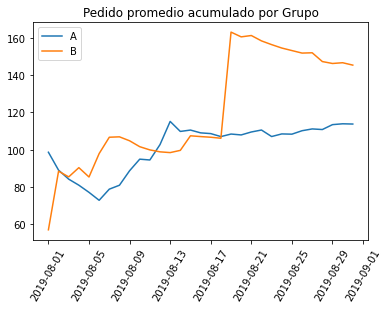

In [47]:
plt.plot(cumulativeRevenueA['date'], (cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders']), label='A')
plt.plot(cumulativeRevenueB['date'], (cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders']), label='B')
plt.legend()
plt.title('Pedido promedio acumulado por Grupo')
plt.xticks(rotation=60)
plt.show(block=False)

El tamaño de pedido promedio comienza un poco flojo para el segmento B, sin embargo a medida que pasan los días este va aumentando, hacia el día 17 se estaba regularizando pero ese día encontramos un pic grosero, despúes de este se tiende a regularizar en los 140. El segmento A tendió a bajar en los primeros días, a parir del quinto o sexto día comenzo a subir para regularizarse por debajo de los 120.

### Diferencia relativa en el tamaño de pedido promedio acumulado: <a id='diferencia_relativa'></a>

Reuniremos los datos obtenidos en un dataframe:

In [33]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

Trasaremos nuestro gráfico de diferencia relativa para los tamaños de pedido promedio:

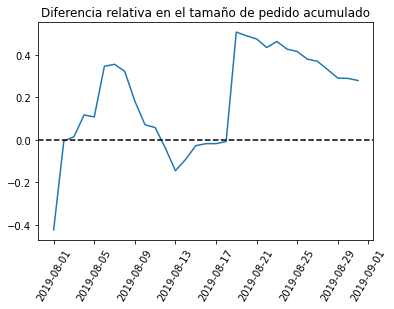

In [34]:
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Diferencia relativa en el tamaño de pedido acumulado')
plt.xticks(rotation=60)
plt.show(block=False)

Se puede apreciar en este gráfico que hay varios cambios repentinos y considerables. Podría ser que tenemos compras anormalmente grandes.

### Tasa de conversión de cada grupo: <a id='conversion_grupo'></a>

Primero calcularemos la conversión acumulada:

In [35]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Seleccionaremos los datos por grupo:

In [36]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Con esta información, trasaremos nuestro gráfico:

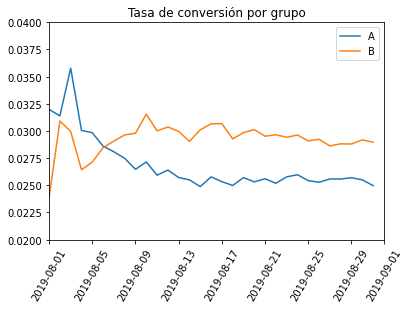

In [43]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0, 0.05])
plt.ylim((0.020,0.04))
plt.title('Tasa de conversión por grupo')
plt.xticks(rotation=60)
plt.show(block=False)

Al inicio de la prueba el segmento a partió con un pic, pero casi de inmediato comenzó a bajar en su tasa de conversión y se mantuvo el resto de la prueba con números bastantes bajos (no superando el 0.031). Por otro lado, el segmento B tuvo una caída similar, pero este remontó y luego se mantuvo con número por arriba del 0.033.

Importante, cambiamos la escala del gráfico para enfatizar que el valor absoluto de la fluctuación al principio y al final de la prueba no son tan altos como parecía (se mueven entre el 3% y el 4%). Trasaremos un gráfico de diferencia relativa para las tasas de conversión acumuladas para confirmar nuestros descubrimientos:

No handles with labels found to put in legend.


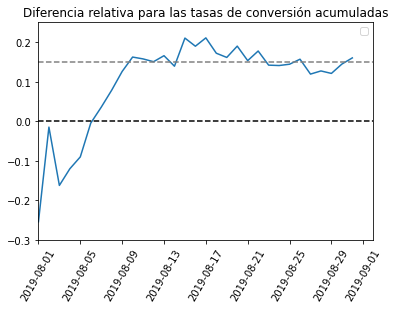

In [41]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-02'), -0.30, 0.25])
plt.title('Diferencia relativa para las tasas de conversión acumuladas')
plt.xticks(rotation=60)
plt.show(block=False)

Como se puede apreciar el grupo B fue lider en conversión casi desde el principio. Gana de manera constante, y su mantiene como 15% por encima del grupo A.

### Dispersión de pedidos por usuario: <a id='dispersion_pedidos'></a>

Como pudimos ver en los apartados anteriores, existe la posibilidad de tener valor extremos que sean más bien excepcionales. Vamos a revisar la dispersión de las ganancias por usuario para poder corroborar esta hipótesis.

In [266]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
ordersByUsers.columns = ['user_id', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

        user_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


Como se ve, la mayoría de los usuarios hiceron 3 pedidos. Trazemos un histograma de distribución con el número de pedido por usuario para revisar la distribución más a fondo:

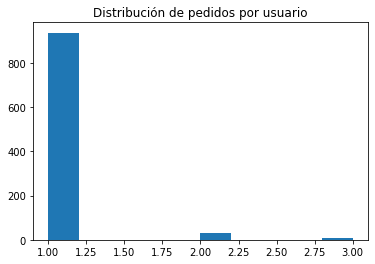

In [267]:
plt.hist(ordersByUsers['orders'])
plt.title('Distribución de pedidos por usuario')
plt.show(block=False)

Como se puede apreciar la mayoría de los usuarios hicieron solo un pedido. Hay ciertos usuarios que hicieron 2 y solo unos pocos 3. Veamos un gráfico de disperción para estudiar mejor la distribución.

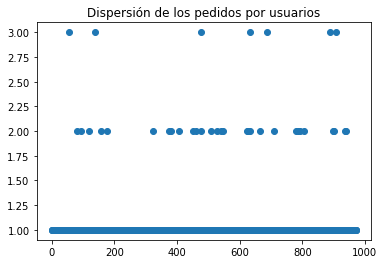

In [268]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Dispersión de los pedidos por usuarios')
plt.show(block=False)

Con este gráfico podemos notar que efectivamente hay varios usuarios con 2, pero no es tan claro si los 3 pedidos cuentan como  anomalías o no. Vamos a calcular los percentiles para responder a esta pregunta.

### ¿Cuando el número de pedidos se convierten en una anomalía?: <a id='pedidos_anomalos'></a>

Vamos a calcular los percentiles para el número de pedidos por usuario:

In [269]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


No más del 1% de los usuarios hicieron más de dos pedidos. 

### Dispersión de precios por pedidos: <a id='dispersion_pedidos'></a>

Como pudimos ver en los apartados anteriores, existe la posibilidad de tener valor extremos que sean más bien excepcionales. Vamos a revisar la dispersión de las ganancias por pedido para poder corroborar esta hipótesis.

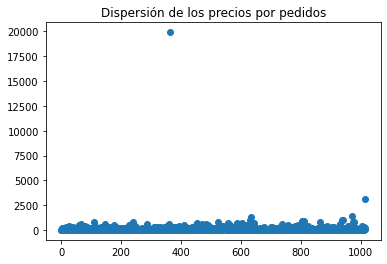

In [270]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Dispersión de los precios por pedidos')
plt.show(block=False)

Como se puede apreciar los pedidos normales no sobrepasan (ni de cerca) los \\$2500. Según el gráfico hay al menos dos pedidos anormales uno a la derecha que pasa la barrera de los \\$2500 y uno que se escapó y que llega a los \\$20.000. Analizaremos más a fondo los valores anormales.

### ¿Cuando los precios se convierten en una anomalía?: <a id='precios_anomalos'></a>

Para responder a esta pregunta calcularemos los percentiles 95 y 99 para los precios por pedido.

In [271]:
print(np.percentile(orders['revenue'], [95,99]))

[414.275 830.3  ]


Encontramos que no más del 5% de los pedidos son de \\$414 y no más del 1% supera los \\$830.

### Significancia estadística de la diferencia en la conversión: <a id='significancia_estadistica'></a>

Crearemos las variables *ordersByUsersA* y *ordersByUsersB* para almacenar las columnas *['visitorId', 'transactionId']*. 

In [272]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

Ahora declararemos las variables *sampleA* y *sampleB*, con usuarios de diferentes grupos y números de pedidos correspondientes. 

In [273]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Aplicaremos el criterio **Wilcoxon-Mann-Whitney** y formatearemos el valor p redondeándolo a tres decimales, además calcularemos  la diferencia relativa en la conversión entre los grupos.

In [274]:
print('El valor p corresponde a:')
print('{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print()
print('La diferencia relativa en la conversión entre los grupos es de:')
print('{0:.3f}'.format(sampleB.mean()/sampleA.mean() - 1))

El valor p corresponde a:
0.01340

La diferencia relativa en la conversión entre los grupos es de:
0.155


El valor p es inferior a 0.05 por lo que podemos rechazar la hipótesis nula. El análisis de datos sin procesar nos muestra que las tasas de conversión de los grupos tienen diferencias estadísticamente significativas. Además, la ganancia de conversión relativa del grupo B en comparación con el grupo A es del 15.5%.

### Significancia estadística de la diferencia en el tamaño promedio de pedido: <a id='significancia_promedio'></a>

Calcularemos ahora la significancia estadística de la diferencia en el tamaño promedio de pedido entre los dos grupos. Vamos a obtener el valor p para comparar los tamaños de pedido promedio de los grupos y la ganancia relativa para el grupo B.

In [275]:
print('El valor p corresponde a:')
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))
print()
print('La ganancia relativa entre los grupos es de:')
print('{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean() - 1))

El valor p corresponde a:
0.862

La ganancia relativa entre los grupos es de:
0.278


El valor p es superior a 0.05 por lo que no existen diferencias estadisticamente significativas entre los tamaños de pedido promedio de los grupos. Pero, la diferencia relativa es del 27.8%. Analisemos las anomalías. 

### Significancia estadística de la diferencia en la conversión (datos filtrados): <a id='significancia_estadistica_2'></a>

Ahora vamos a eliminar las anomalías de nuestros datos. Para ello, primero vamos crear un conjunto con los datos anómalos.

In [276]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 830]['visitor_id']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64


Ahora tenemos un conjunto de usuarios anómalos. Después de eliminarlos, podremos calcular la significancia estadística. Necesitaremos saber si los datos filtrados muestran alguna diferencia significativa entre los grupos.

In [277]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('El valor p corresponde a:')
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print()
print('La diferencia relativa en la conversión entre los grupos es de:')
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean() - 1))

El valor p corresponde a:
0.00629

La diferencia relativa en la conversión entre los grupos es de:
0.192


Como se puede apreciar, hemos alcanzado el nivel de significación. Al igual que con los datos sin procesar, el valor p se encuentra por debajo de 0.05. Las diferencias siguen siendo estadísticamente significativas. Además, la ganancia de conversión relativa del grupo B en comparación con el grupo A aumentó al 19.2%. El segmento B es mejor que el segmento A.

### Significancia estadística de la diferencia en el tamaño promedio de pedido (datos filtrados): <a id='significancia_promedio_2'></a>

Ahora eliminaremos las anomalías y calcularemos la significancia estadística de la diferencia en el tamaño medio de los pedidos.

In [278]:
print('El valor p corresponde a:')
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))
print()
print('La ganancia relativa entre los grupos filtrados es de:')
print('{0:.3f}'.format(
    orders[np.logical_and(
        orders['group'] == 'B', 
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group'] == 'A', 
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

El valor p corresponde a:
0.877

La ganancia relativa entre los grupos filtrados es de:
-0.014


El valor p aumentó, y es superior a 0.05 por lo que no existen diferencias estadisticamente significativas entre los tamaños de pedido promedio de los grupos. Además ahora la diferencia entre los segmentos es del 1.4% en lugar del 27.8%. Podemos notar un cambio grande en los valores filtrados.

## Conclusión General <a id='conclusion_general'></a>

### Conclusión de la primera parte: <a id='conclusion_1'></a>

Recibimos el archivo *hypotheses_us.csv* el cual contiene nuevo hipótesis sobre cómo aumentar los ingresos de una tienda en línea. Realizamos dos análisis para encontrar cuales son las hipótesis más prometedoras. Realizamos el análisis con el framework **ICE** el cúal presentó las hípotesis *Launch a promotion that gives users discounts...*, *Add two new channels for attracting traffic...* y *Add a subscription form to all the main pages* (8, 0 y 7 respectivamente) como las más prometedoras.

Sin embargo, cuando realizamos el mismo análisis con el framework **RICE**, encontramos que la hipótesis más prometedora con diferencia es *Add a subscription form to all the main pages* (7). Muy por debajo de esta se encuentra las siguientes hipótesis *Add product recommendation blocks to the store...*, *Add two new channels for attracting traffic...*, *Show banners with current offers and sales on...* y *Launch a promotion that gives users discounts* (2, 0, 6 y 8 respectivamente).

En conclusión, considerando los puntajes en ambos frameworks, la hipótesis *Add a subscription form to all the main pages* (7) es sin discusión alguna la más prometedora. Sus valores por parámetros son *esfuerzo* intermedio (valor 5 de 10), el parámatro de *confianza* muy alto (8 de 10) y un *impact* también alto (7 de 10), el parametro *Reach* es 10, que si lo comparamos con las más prometedoras del método ICE hipótesis 8 tiene un Reach de solo 1 y la hipótesis de índice 0 tiene un Reach de 3.

### Conclusión de la segunda parte: <a id='conclusion_2'></a>

Recibimos dos archivos *orders_us.csv* y *visitors_us.csv* con los resultados de un test A/B. Estos son los hechos que encontramos:
   - El análisis de datos sin procesar y los filtrados nos mostraron que las tasas de conversión de los grupos tienen diferencias estadísticamente significativas. Alcansamos el nivel de significación. Además, la ganancia de conversión relativa del grupo B en comparación con el grupo A es del 15.5% con los datos sin procesar y aumentó al 19.2% con los datos filtrados.
   - Los datos sin procesar y los filtrados no revelaron diferencias estadísticamente significativas en el tamaño promedio de los pedidos entre los grupos. Además la diferencia relativa es del 27.8% para los datos sin procesar, pero bajó al 1.4% para los datos filtrados.
   - El gráfico que muestra la diferencia de conversión entre los grupos nos dice que los resultados del grupo B son mejores y no parece que vayan a empeorar:
    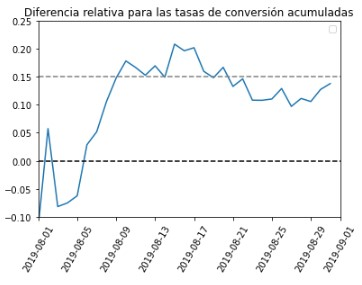

   - El gráfico que muestra la diferencia en el tamaño medio de los pedidos entre los grupos nos muestra que si bien los resultados del grupo B tuvieron varios altibajos, pero se tiende a estabilizar bastante por encima del grupo A:
    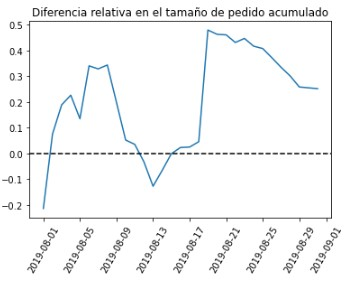
    
Basándonos en estos hechos, podemos concluir que la prueba fue exitosa y además podemos detenerla. No tiene sentido continuarla ya que las cifras claramente indican al segmento B como mejor que el A.   
    